In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from sklearn import svm


In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head(3)

wine_class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   

   color_intensity   hue  OD280_or_OD315  proline  
0             5.64  1.04            3.92     1065  
1             4.38  1.05            3.40     1050  
2             5.68  1.03            3.17     1185

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_class            178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  OD280_or_OD315        178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.columns = ["Cultivar","Alcohol","Malic","Ash","Alkalinity",
              "Magnesium","Phenols","Flavanoids","Nonflav",
              "Proanthocyan","Color","Hue","OD280","Proline"]

rows, cols = df.shape
print("Dataframe has", rows, "records and", cols, "variables.\n")
df.head()

Dataframe has 178 records and 14 variables.



Cultivar  Alcohol  Malic   Ash  Alkalinity  Magnesium  Phenols  Flavanoids  \
0         1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1         1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2         1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3         1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4         1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflav  Proanthocyan  Color   Hue  OD280  Proline  
0     0.28          2.29   5.64  1.04   3.92     1065  
1     0.26          1.28   4.38  1.05   3.40     1050  
2     0.30          2.81   5.68  1.03   3.17     1185  
3     0.24          2.18   7.80  0.86   3.45     1480  
4     0.39          1.82   4.32  1.04   2.93      735

In [6]:
df.isnull().sum()

Cultivar        0
Alcohol         0
Malic           0
Ash             0
Alkalinity      0
Magnesium       0
Phenols         0
Flavanoids      0
Nonflav         0
Proanthocyan    0
Color           0
Hue             0
OD280           0
Proline         0
dtype: int64

In [7]:
NaN_data_flag = df.isnull().any()
if NaN_data_flag.any():
    print("Some records have NaN values. These will be removed...\n")
    before_rows, before_cols = df.shape
    wine_df = df.dropna()
    after_rows, after_cols = df.shape
    print("Dropped", after_rows - before_rows, "records. Cleaned dataframe has", after_rows, "records.\n")
else:
    print("There are no records with NaN values. Dataframe is already clean.\n")

There are no records with NaN values. Dataframe is already clean.



In [8]:
df.describe().round(3)

Cultivar  Alcohol    Malic      Ash  Alkalinity  Magnesium  Phenols  \
count   178.000  178.000  178.000  178.000     178.000    178.000  178.000   
mean      1.938   13.001    2.336    2.367      19.495     99.742    2.295   
std       0.775    0.812    1.117    0.274       3.340     14.282    0.626   
min       1.000   11.030    0.740    1.360      10.600     70.000    0.980   
25%       1.000   12.362    1.602    2.210      17.200     88.000    1.742   
50%       2.000   13.050    1.865    2.360      19.500     98.000    2.355   
75%       3.000   13.678    3.082    2.558      21.500    107.000    2.800   
max       3.000   14.830    5.800    3.230      30.000    162.000    3.880   

       Flavanoids  Nonflav  Proanthocyan    Color      Hue    OD280   Proline  
count     178.000  178.000       178.000  178.000  178.000  178.000   178.000  
mean        2.029    0.362         1.591    5.058    0.957    2.612   746.893  
std         0.999    0.124         0.572    2.318    0.229    0.710   314.907  
min         0.340    0.130         0.410    1.280    0.480    1.270   278.000  
25%         1.205    0.270         1.250    3.220    0.782    1.938   500.500  
50%         2.135    0.340         1.555    4.690    0.965    2.780   673.500  
75%         2.875    0.438         1.950    6.200    1.120    3.170   985.000  
max         5.080    0.660         3.580   13.000    1.710    4.000  1680.000

In [9]:
df.describe().loc[['min', 'max']].T

min      max
Cultivar        1.00     3.00
Alcohol        11.03    14.83
Malic           0.74     5.80
Ash             1.36     3.23
Alkalinity     10.60    30.00
Magnesium      70.00   162.00
Phenols         0.98     3.88
Flavanoids      0.34     5.08
Nonflav         0.13     0.66
Proanthocyan    0.41     3.58
Color           1.28    13.00
Hue             0.48     1.71
OD280           1.27     4.00
Proline       278.00  1680.00

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

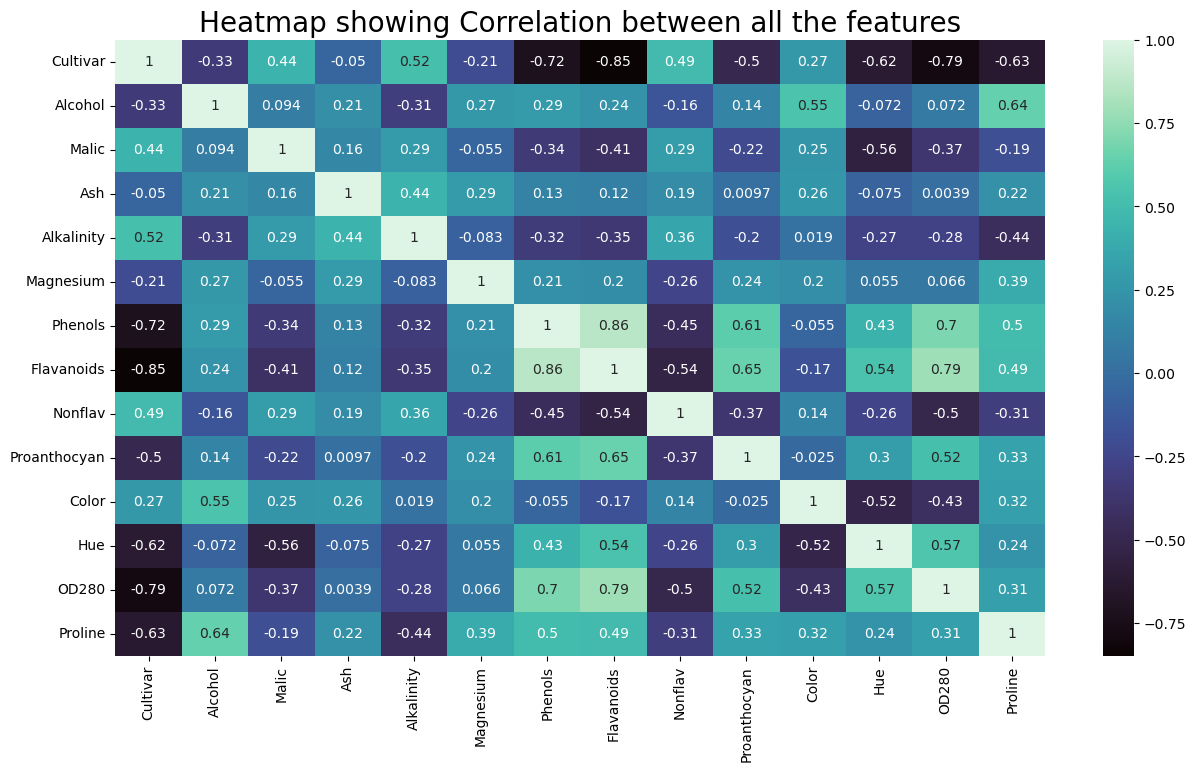

In [10]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


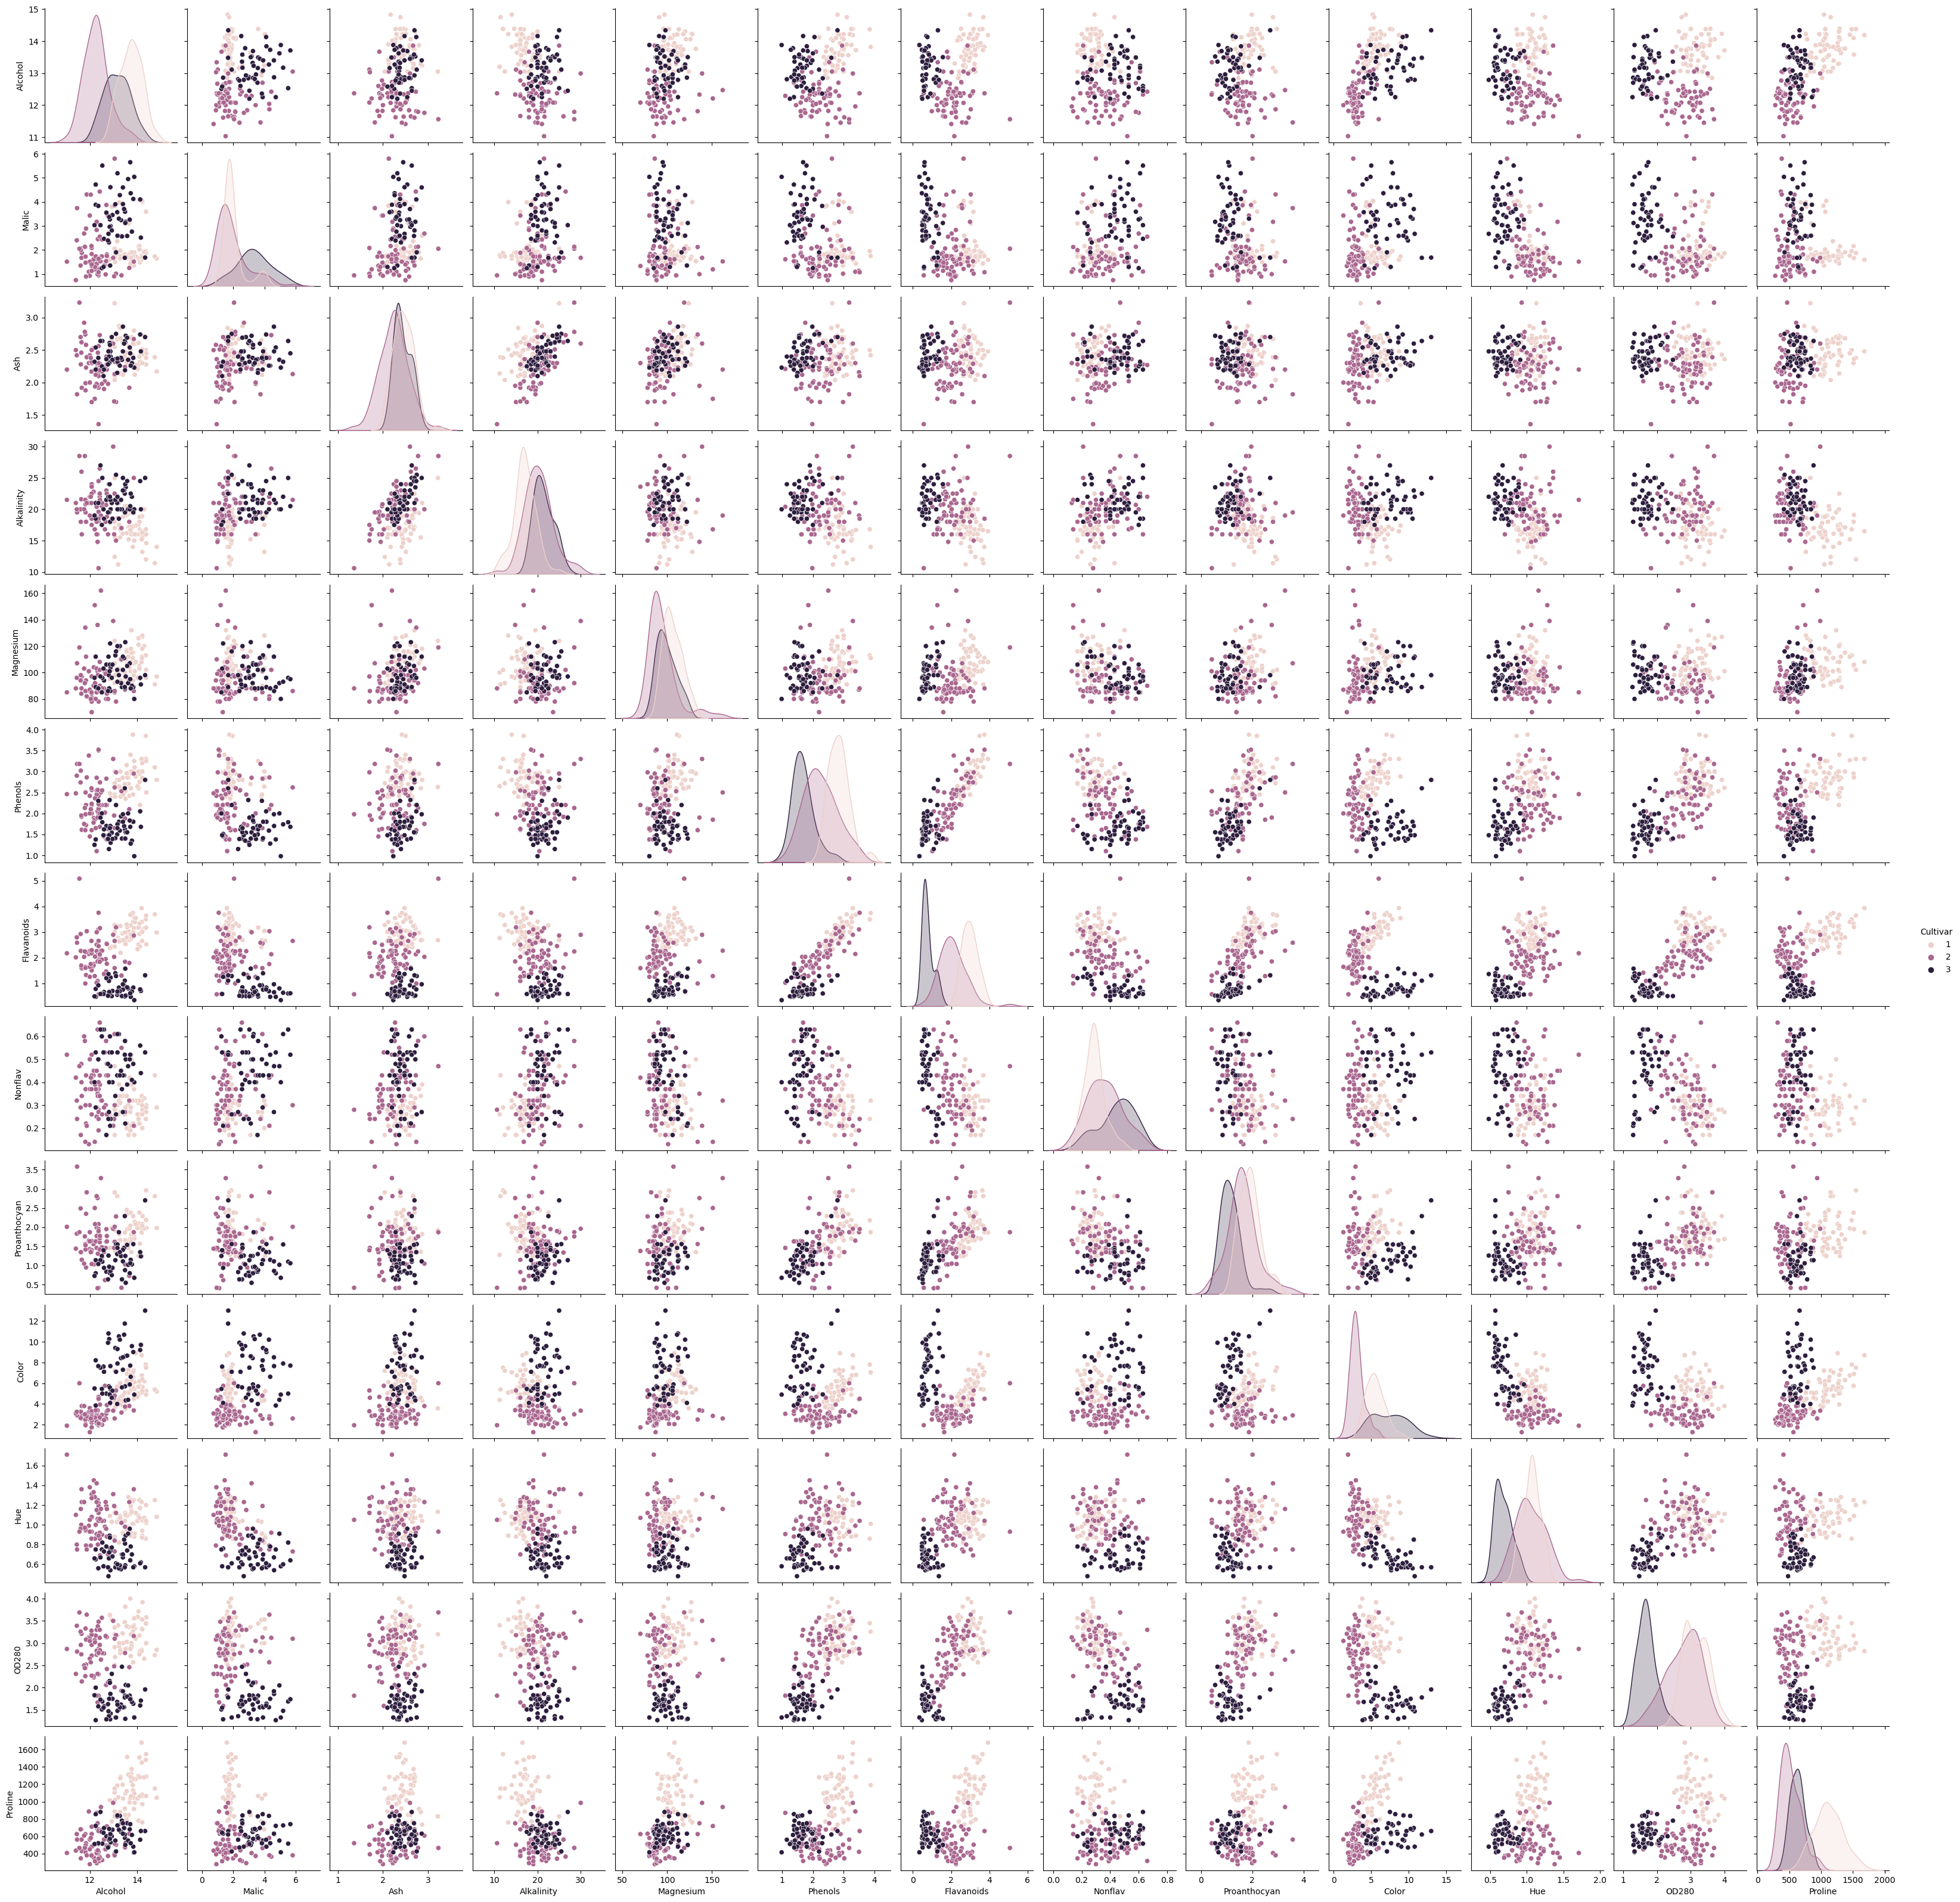

In [11]:
columns_to_plot = list(df.columns)
columns_to_plot.remove('Cultivar')
sns.pairplot(df, hue='Cultivar', vars=columns_to_plot);
# the hue parameter colors data instances baces on their value in the 'Target' column.

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


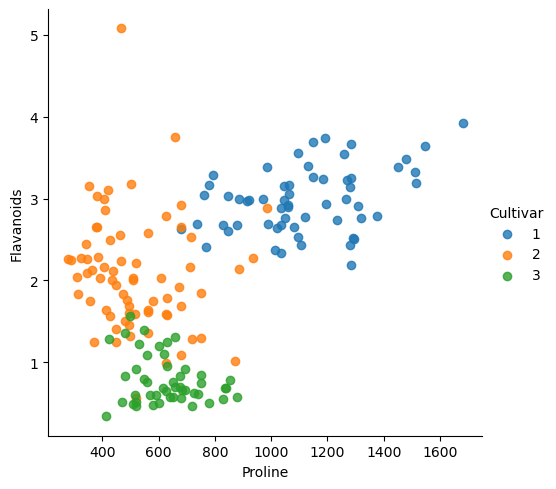

In [12]:
sns.lmplot(x='Proline', y='Flavanoids', hue='Cultivar', data=df, fit_reg=False);

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


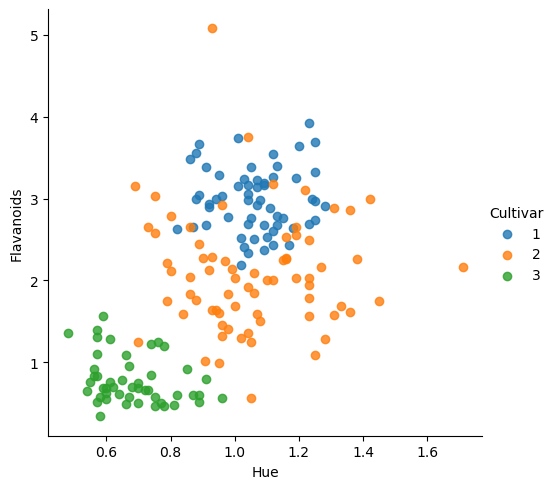

In [13]:
sns.lmplot(x='Hue', y='Flavanoids', hue='Cultivar', data=df, fit_reg=False);

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


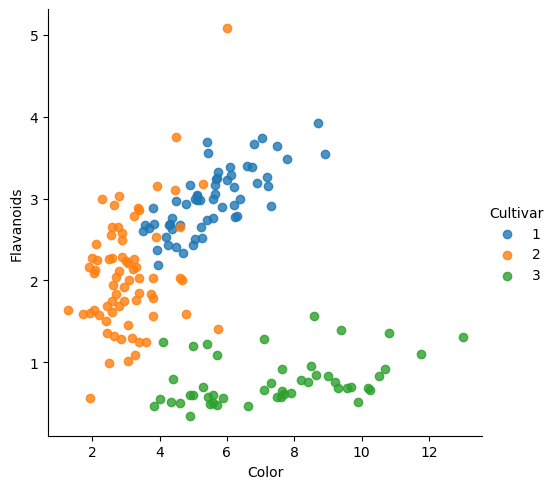

In [14]:
# This is a good feature comination to separate the red ones (label 3)
sns.lmplot(x='Color', y='Flavanoids', hue='Cultivar', data=df, fit_reg=False);

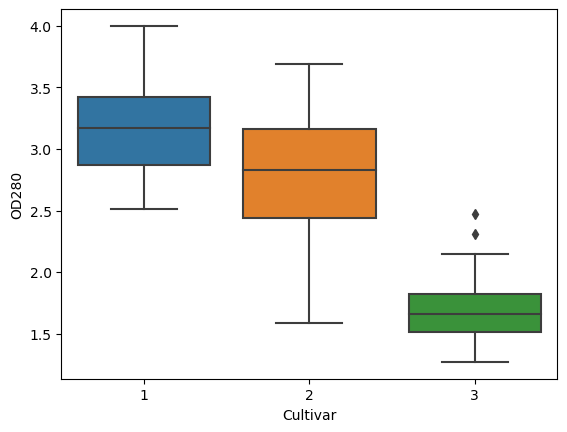

In [15]:
sns.boxplot(x=df['Cultivar'], y=df['OD280']);
# this is a vey good feature to separate label 1 and 3

In [16]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
#import plotly.express as px
init_notebook_mode(connected=True) # to show plots in notebook
# online plotly
from plotly.offline import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXX')

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
class_dict = {1: "class 1", 2: "class 2",3:"class 3"}

In [17]:
y=df["Cultivar"].value_counts()
data_bar = [go.Bar(x=[class_dict[x] for x in y.index], 
                y=y.values,
                marker=dict(color=colors[:len(y.index)])
               )]
layout = go.Layout(
    title='Cultivar Class Distribution',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='',
    ),
)
total_class = df['Cultivar'].value_counts()
print(total_class,"\n")
print ()
fig = go.Figure(data=data_bar, layout= layout)
#fig.show()
iplot(fig, filename='basic-bar3')


Cultivar
2    71
1    59
3    48
Name: count, dtype: int64 




In [18]:
import plotly.graph_objects as go

data_3=[go.Pie(
    labels=[class_dict[x] for x in y.index],
    values=y.values,
    marker=dict(colors=colors[:len(y.index)])
    
)]

layout_percent = go.Layout(
    title='Percentage class Distribution',
    autosize=False,
    width=400,
    height=400,
)

fig=go.Figure(data=data_3,layout=layout_percent)
fig.show()
#iplot(fig, filename='new')

In [19]:
pre_df = df.copy()
pre_df.head(3)

Cultivar  Alcohol  Malic   Ash  Alkalinity  Magnesium  Phenols  Flavanoids  \
0         1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1         1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2         1    13.16   2.36  2.67        18.6        101     2.80        3.24   

   Nonflav  Proanthocyan  Color   Hue  OD280  Proline  
0     0.28          2.29   5.64  1.04   3.92     1065  
1     0.26          1.28   4.38  1.05   3.40     1050  
2     0.30          2.81   5.68  1.03   3.17     1185

In [20]:
corr = pre_df.corr()
trace = go.Heatmap(z=corr.values.tolist(), x=corr.columns, y=corr.columns )
data_heatmap=[trace]
layout = go.Layout(
    title='Heatmap of pairwise correlation of the columns',
    autosize=False,
    width=850,
    height=700,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=40),
    margin=go.layout.Margin(l=0, r=200, b=200, t=80),

)


fig = go.Figure(data=data_heatmap, layout=layout)
iplot(fig, filename='labelled-heatmap1')


In [21]:
import heapq

print('Absolute overall correlations')
print('-' * 30)
corr_abs_sum = corr[corr.columns].abs().sum()
print(corr_abs_sum, '\n')

Absolute overall correlations
------------------------------
Cultivar        7.402563
Alcohol         4.367915
Malic           4.670193
Ash             3.156218
Alkalinity      4.885079
Magnesium       3.522095
Phenols         6.621719
Flavanoids      7.209950
Nonflav         5.312493
Proanthocyan    5.101221
Color           4.197137
Hue             5.513241
OD280           6.392491
Proline         6.026176
dtype: float64 



In [22]:
print('Heighest correlations')
print('-' * 20)
print(corr_abs_sum.nlargest(4))

print('Weakest correlations')
print('-' * 20)
print(corr_abs_sum.nsmallest(3),'\n')

Heighest correlations
--------------------
Cultivar      7.402563
Flavanoids    7.209950
Phenols       6.621719
OD280         6.392491
dtype: float64
Weakest correlations
--------------------
Ash          3.156218
Magnesium    3.522095
Color        4.197137
dtype: float64 



In [23]:
df['Cultivar1'] = df['Cultivar'] == 1
df['Cultivar2'] = df['Cultivar'] == 2
df['Cultivar3'] = df['Cultivar'] == 3
corrVariables = ['Cultivar1', 'Cultivar2', 'Cultivar3', 'Alcohol', 'Magnesium',
                'Phenols', 'Flavanoids', 'Nonflav', 'Ash', 'Alkalinity', 'Color', 'Hue', 
                 'Proanthocyan', 'OD280', 'Malic', 'Proline']
cultivars_df = df[corrVariables]


# Correlation
corr = cultivars_df.corr().round(2)
corr = corr[['Cultivar1', 'Cultivar2', 'Cultivar3']]
cultivarCorr = corr.drop(['Cultivar1', 'Cultivar2', 'Cultivar3'], axis = 0)
cultivarCorr

Cultivar1  Cultivar2  Cultivar3
Alcohol            0.65      -0.73       0.11
Magnesium          0.33      -0.30      -0.02
Phenols            0.61      -0.05      -0.60
Flavanoids         0.67       0.04      -0.76
Nonflav           -0.41       0.01       0.42
Ash                0.23      -0.36       0.16
Alkalinity        -0.52       0.18       0.35
Color              0.14      -0.69       0.61
Hue                0.32       0.35      -0.73
Proanthocyan       0.38       0.06      -0.47
OD280              0.54       0.20      -0.80
Malic             -0.21      -0.30       0.54
Proline            0.83      -0.59      -0.23

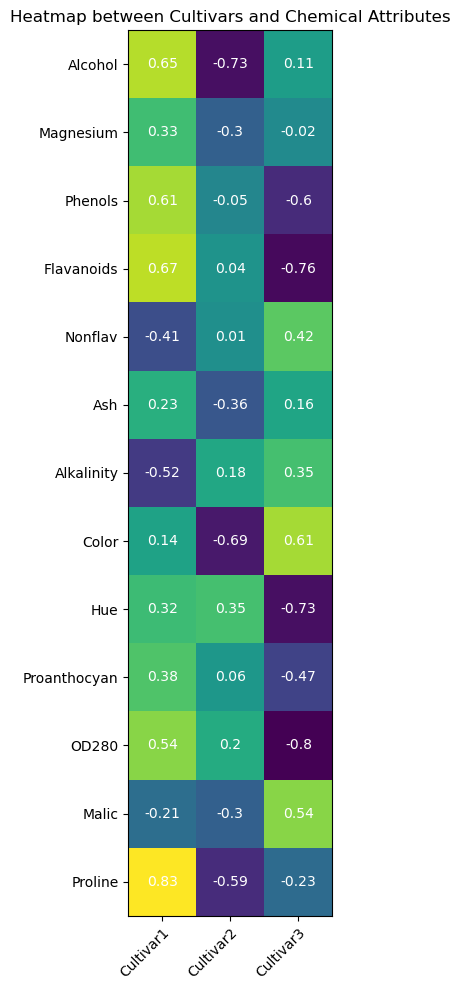

In [24]:
# Heatmap of the correlation matrix above
heatmapRows = ['Cultivar1', 'Cultivar2', 'Cultivar3']
heatmapCols = ['Alcohol', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflav', 'Ash', 
               'Alkalinity', 'Color', 'Hue', 'Proanthocyan', 'OD280', 'Malic', 'Proline']

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cultivarCorr, interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(heatmapRows)))
ax.set_yticks(np.arange(len(heatmapCols)))
# ... and label them with the respective list entries
ax.set_xticklabels(heatmapRows)
ax.set_yticklabels(heatmapCols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(heatmapCols)):
    for j in range(len(heatmapRows)):
        text = ax.text(j, i, cultivarCorr.iloc[i][j], ha="center", va="center", color="w")

ax.set_title("Heatmap between Cultivars and Chemical Attributes")
fig.tight_layout()
plt.show()

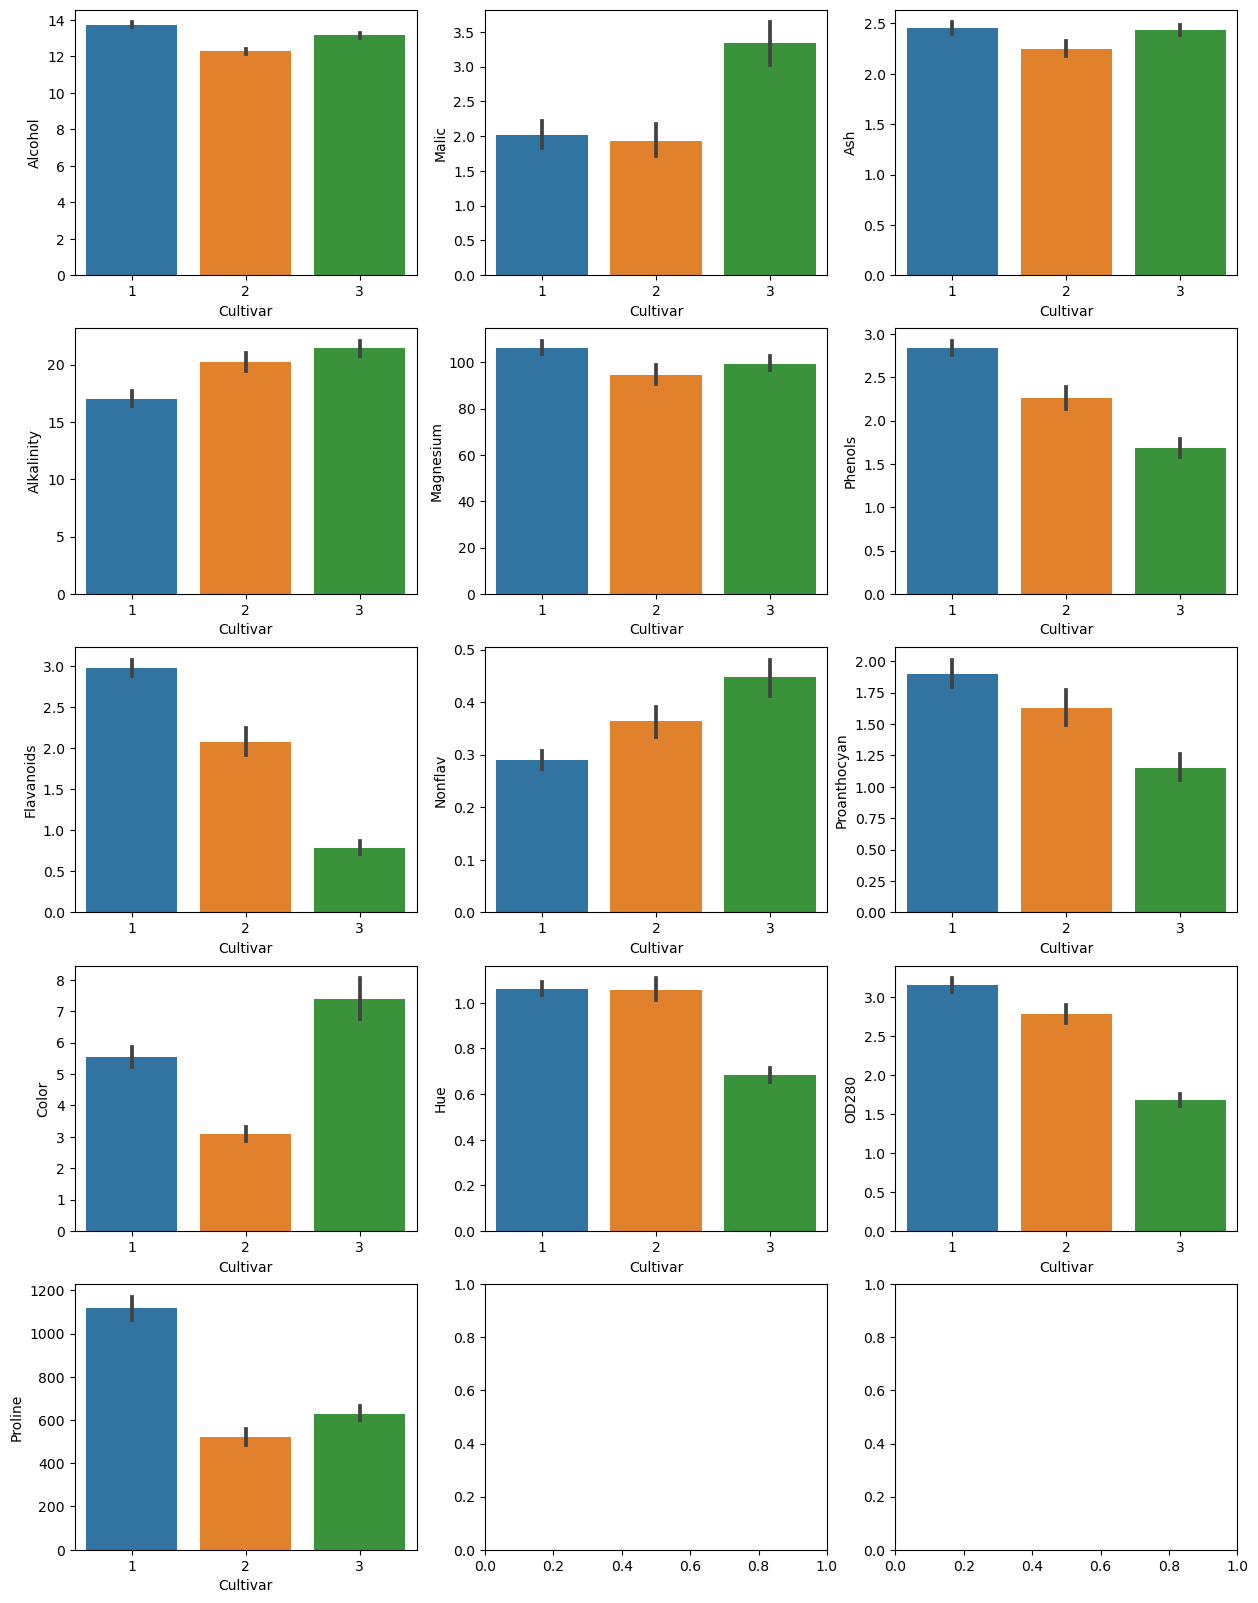

In [25]:
fig, ax = plt.subplots(5,3 , figsize = (15,20)) # Making Subplots

sns.barplot(data = df, y ="Alcohol", x="Cultivar", ax=ax[0,0]);
sns.barplot(data = df, y ="Malic", x="Cultivar", ax=ax[0,1]);
sns.barplot(data = df, y ="Ash", x="Cultivar", ax=ax[0,2]);
sns.barplot(data = df, y ="Alkalinity", x="Cultivar", ax=ax[1,0]);
sns.barplot(data = df, y ="Magnesium", x="Cultivar", ax=ax[1,1]);
sns.barplot(data = df, y ="Phenols", x="Cultivar", ax=ax[1,2]);
sns.barplot(data = df, y ="Flavanoids", x="Cultivar", ax=ax[2,0]);
sns.barplot(data = df, y ="Nonflav", x="Cultivar", ax=ax[2,1]);
sns.barplot(data = df, y ="Proanthocyan", x="Cultivar", ax=ax[2,2]);
sns.barplot(data = df, y ="Color", x="Cultivar", ax=ax[3,0]);
sns.barplot(data = df, y ="Hue", x="Cultivar", ax=ax[3,1]);
sns.barplot(data = df, y ="OD280", x="Cultivar", ax=ax[3,2]);
sns.barplot(data = df, y ="Proline", x="Cultivar", ax=ax[4,0]);

In [26]:
# Splitting datset to X and y axis 

X=df.iloc[: , 1:14].values
y=df.iloc[: ,0].values

In [27]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)


## **Model Selection**

In [43]:
# Adding layers and activation function

import tensorflow as tf
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='tanh'))

#Compiling
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
# Training the model

ann.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: -14.7416 - accuracy: 0.3169
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: -14.9167 - accuracy: 0.3169
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 11/

In [45]:
# Prediction on Test data

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 9ms/step
[[1 1]
 [1 3]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 3]
 [1 2]
 [1 2]
 [1 3]
 [1 3]
 [1 1]
 [1 2]
 [1 3]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 3]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]]


In [46]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [16  0  0]
 [ 6  0  0]]


0.3888888888888889

## **SVM All Atribut**

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [63]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [64]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

[[1 1]
 [2 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 3]
 [2 2]
 [2 2]
 [3 3]
 [2 3]
 [1 1]
 [3 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 1]
 [3 2]
 [3 2]
 [2 2]
 [2 2]
 [2 2]
 [3 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


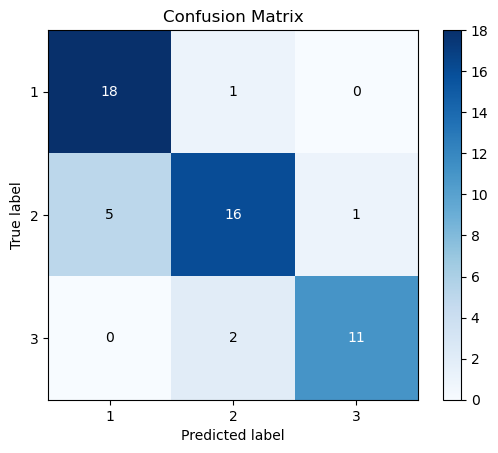

In [85]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [86]:
# Calculating quality for model
import time
from sklearn.metrics import confusion_matrix, accuracy_score

#Model Accuracy
start_time = time.time()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Akurasi Support Vector Machine ",accuracy_score(y_test, y_pred))

prediction_time = time.time() - start_time
print(f"Waktu Eksekusi : {prediction_time:.9f} seconds")

[[18  1  0]
 [ 5 16  1]
 [ 0  2 11]]
Akurasi Support Vector Machine  0.8333333333333334
Waktu Eksekusi : 0.008478165 seconds


## **SVM Atribut Predictor Flavanoids & Phenols**

In [104]:
X1 = df[["Flavanoids","Phenols"]] #prediktor
y1 = df[["Cultivar"]] # target
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [105]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
# Predicting the values
y_pred1=classifier.predict(X_test1)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

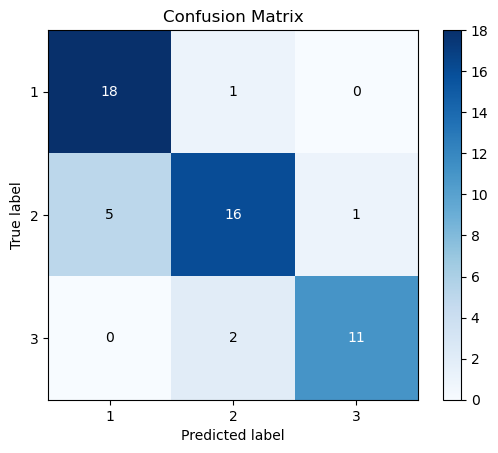

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, normalize=False)
plt.show()

In [ ]:
# Calculating quality for model
import time
from sklearn.metrics import confusion_matrix, accuracy_score

#Model Accuracy
start_time = time.time()
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
print("Akurasi Support Vector Machine ",accuracy_score(y_test1, y_pred1))

prediction_time = time.time() - start_time
print(f"Waktu Eksekusi : {prediction_time:.9f} seconds")

[[18  1  0]
 [ 5 16  1]
 [ 0  2 11]]
Akurasi Support Vector Machine  0.8333333333333334
Waktu Eksekusi : 0.001190186 seconds


## **SVM Atribut Predictor OD280**

In [57]:
X2 = df[["OD280"]] #prediktor
y2 = df[["Cultivar"]] # target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [58]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train2,y_train2)

SVC(random_state=1)

In [ ]:
# Predicting the values
y_pred=classifier.predict(X_test2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test2.reshape(len(y_test2),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

## Tester Data Final

In [ ]:
# In this case maximum quality is for SVM so we will use this algorithm

fin_test_data = pd.read_csv('test.csv')
test_data = fin_test_data.drop('id',axis=1)
test_data = sc.fit_transform(test_data)

In [ ]:
final_pred = final_classifier.predict(test_data)
final_pred

array([3, 2, 3, 1, 3, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 1, 2, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 3, 3,
       1, 2, 1, 3, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 3, 3,
       3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 2,
       1, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 1,
       1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2, 1, 2, 2,
       1, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 3, 2, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 1, 2,
       1, 1], dtype=int64)

In [ ]:
sample_submit = pd.read_csv('sample_submit.csv')
sample_submit

id  target
0      0       0
1      1       0
2      2       0
3      3       0
4      4       0
..   ...     ...
173  173       0
174  174       0
175  175       0
176  176       0
177  177       0

[178 rows x 2 columns]

In [ ]:
output = pd.DataFrame({'id':fin_test_data.id,'target':final_pred})
output.to_csv('my_submission.csv', index=False)
filename = "my_submission.csv"
print("Your submission was successfully saved!")

Your submission was successfully saved!
